In [16]:
import numpy as np
import pandas as pd
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [18]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [19]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [20]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [22]:
import numpy as np
import math

def mini_batch_GD(X, y_true, epochs, batch_size, learning_rate=0.01):
    total_features = X.shape[1]
    total_samples = X.shape[0]
    w = np.ones(total_features)
    b = 0
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    num_batches = math.ceil(total_samples / batch_size)
    
    for i in range(epochs):
        random_indexes = np.random.permutation(total_samples)
        X_temp = X[random_indexes]
        Y_temp = y_true[random_indexes]
        
        for j in range(0, total_samples, batch_size):
            Xj = X_temp[j:min(j+batch_size, total_samples)]
            yj = Y_temp[j:min(j+batch_size, total_samples)]
            
            y_pred = np.dot(Xj, w) + b
            
            if Xj.shape[0] > 0:  # Check to avoid division by zero
                # Differentiation of MSE and see the result by putting in the value of y_pred in it
                w_grad = -(2/Xj.shape[0]) * (Xj.T.dot(yj - y_pred))
                b_grad = -(2/Xj.shape[0]) * np.sum(yj - y_pred)
                # The first differentiation will be with respect to dw and the second will be with respect to b
                # It is partial derivative

                w = w - learning_rate * w_grad
                b = b - learning_rate * b_grad
            
            cost = np.mean(np.square(yj - y_pred))  # Mean Squared Error
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

# Example Usage:
# Assuming scaled_X and scaled_y are defined as numpy arrays
w, b, cost, cost_list, epoch_list = mini_batch_GD(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs=100,
    batch_size=5
)
print(w, b, cost)


[0.7247099  0.69445487] -0.24761880156873792 0.002413063040218434


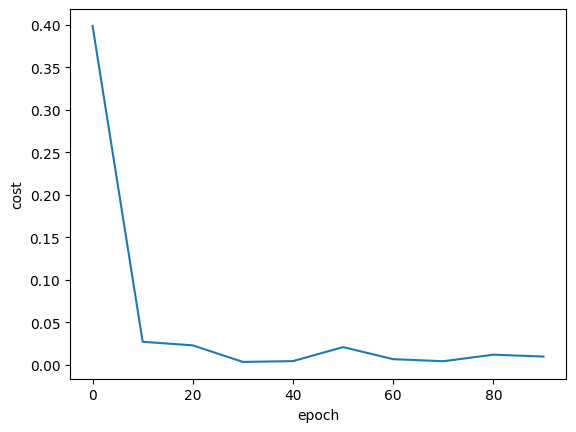

In [23]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [24]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

c:\Users\Avichal Dwivedi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


129.61070827223529

In [25]:
predict(1000,2,w,b)

c:\Users\Avichal Dwivedi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


28.756612540849755

In [26]:
predict(2000,4,w,b)

c:\Users\Avichal Dwivedi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


109.3688111591719